<div style="background:#5D6D7E;padding:20px;color:#ffffff;margin-top:10px;">

# NLP - Portafolio de Ejercicios 1

## Profesora: Lisibonny Beato
### Período 3-2024-2025</div>


In [545]:
# Importando algunas librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import textblob
import string
from nltk import WordNetLemmatizer
from nltk.corpus import names, wordnet, webtext, stopwords, opinion_lexicon
from nltk.stem import PorterStemmer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

## 1. Recolección de datos
### Puntuación máxima de la tarea: 1
#### Investigue en detalle sobre el corpus webtext de NLTK. Elija un archivo de dicho corpus para trabajar los siguientes puntos y explique en detalle lo que contiene y el motivo de su elección. 

In [546]:
# Veamos los difretnes archivos del corpus webtext.
webtext.fileids()
# Elijamos grail.txt
grail = webtext.raw('grail.txt').split('\n')

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Elegi el de grail.txt por la razon de que fue el que me llamo mas la atencion, tiene humor y esta un personaje que me gusta mucho que es Rey Arturo. Lo que contiene es una parodia de la historia del Rey arturo original pero como si fuese don quijote ya que a medida que lo vas leyendo te vas dando cuenta que el Rey Arturo narra una fantasia muy lejos de la realidad cuando habla, y te das cuenta por como el soldado #1 lo demuestra cuando habla. 
</div>

## 2. Descripción y exploración de datos
### Puntuación máxima de la tarea: 1
#### Utilizando pandas realice distintas descriptivas y exploraciones sobre los textos y comente acerca de sus hallazgos

In [547]:
# Convertimos a DataFrame
df = pd.DataFrame(grail, columns=['lines'])

In [548]:
# Convertir líneas a oraciones
def linesToSentences(line):
    return nltk.sent_tokenize(line)

# Convertir oraciones a listas de palabras
def sentencesToWords(sentences):
    return [nltk.word_tokenize(sentence) for sentence in sentences]

# Contar total de oraciones por línea
def countSentences(sentences):
    return len(sentences)

# Contar total de palabras por línea
def countWords(nested_word_lists):
    return sum(len(word_list) for word_list in nested_word_lists)

# Contar total caracteres por linea.
def countCharacters(line):
    return len(line)


In [549]:
# Aplicamos transformaciones
df['sentences'] = df['lines'].apply(linesToSentences)
df['words'] = df['sentences'].apply(sentencesToWords)
df['totalSentences'] = df['sentences'].apply(countSentences)
df['totalWords'] = df['words'].apply(countWords)
df['totalCharacters'] = df['lines'].apply(countCharacters)

In [550]:
df

,lines,sentences,words,totalSentences,totalWords,totalCharacters
0,SCENE 1: [wind] [clop clop clop],[SCENE 1: [wind] [clop clop clop]],"[[SCENE, 1, :, [, wind, ], [, clop, clop, clop...",1,11,33
1,KING ARTHUR: Whoa there! [clop clop clop],"[KING ARTHUR: Whoa there!, [clop clop clop]]","[[KING, ARTHUR, :, Whoa, there, !], [[, clop, ...",2,11,43
2,SOLDIER #1: Halt! Who goes there?,"[SOLDIER #1: Halt!, Who goes there?]","[[SOLDIER, #, 1, :, Halt, !], [Who, goes, ther...",2,10,34
3,"ARTHUR: It is I, Arthur, son of Uther Pendrago...","[ARTHUR: It is I, Arthur, son of Uther Pendrag...","[[ARTHUR, :, It, is, I, ,, Arthur, ,, son, of,...",2,34,148
4,SOLDIER #1: Pull the other one!,[SOLDIER #1: Pull the other one!],"[[SOLDIER, #, 1, :, Pull, the, other, one, !]]",1,9,31
...,...,...,...,...,...,...
1187,OFFICER #2: Come on. Back with 'em. Back. R...,"[OFFICER #2: Come on., Back with 'em., Back., ...","[[OFFICER, #, 2, :, Come, on, .], [Back, with,...",5,18,64
1188,INSPECTOR: Everything? [squeak],"[INSPECTOR: Everything?, [squeak]]","[[INSPECTOR, :, Everything, ?], [[, squeak, ]]]",2,7,32
1189,"OFFICER #1: All right, sonny. That's enough. ...","[OFFICER #1: All right, sonny., That's enough....","[[OFFICER, #, 1, :, All, right, ,, sonny, .], ...",4,21,74
1190,CAMERAMAN: Christ!,[CAMERAMAN: Christ!],"[[CAMERAMAN, :, Christ, !]]",1,4,18


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

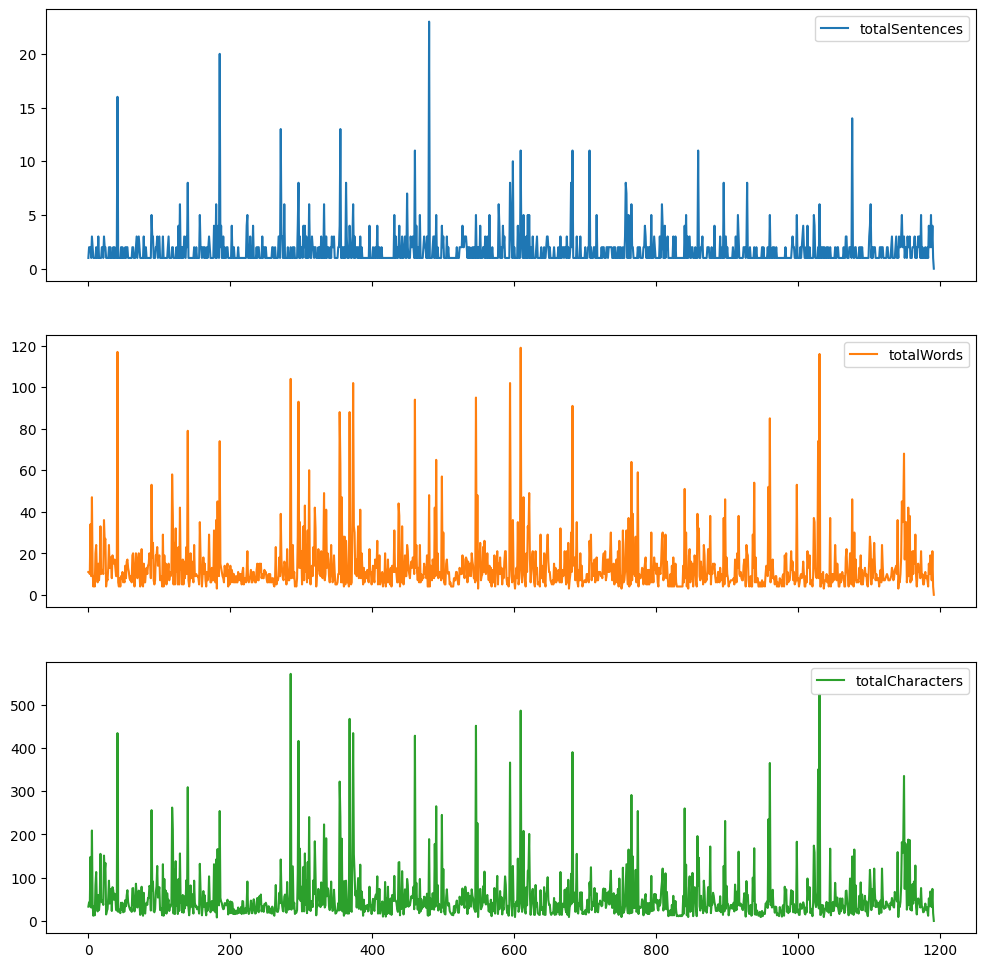

In [551]:
df.plot(kind = 'line', subplots = True, figsize = (12,12))

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Gracias a este proceso de tomar el texto y sacar de el: 
    
    1. Total de lineas.
    2. Total de oraciones.
    3. Total de palabras.


Se puede tomar un paso a analizar el promedio de distintas cosas tales como:

- Oraciones promedio por lineas.
- Palabras promedio por oracion.
- Caracteres promedio por linea.
- etc.
</div>

In [552]:
# Hagamos un promedio de las colimnas con nombres total* usando el metodo mean() de la libreria Pandas.
dfPromedio = df[['totalWords','totalSentences','totalCharacters']].mean()
dfPromedio

totalWords         13.809564
totalSentences      1.773490
totalCharacters    53.533557
dtype: float64

<Axes: title={'center': 'Cantidad promedio'}>

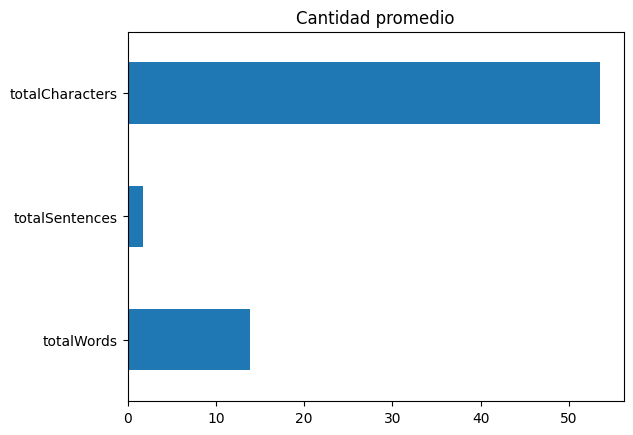

In [553]:
# Estos datos se pueden presentar en un grafico barra para mas apreciacion.
dfPromedio.plot(kind='barh', title = 'Cantidad promedio')

In [554]:
# Hagamos un min y max de las colimnas con nombres total* usando el metodo mean() de la libreria Pandas.
dfMax = df[['totalWords','totalSentences','totalCharacters']].max()
dfMin = df[['totalWords','totalSentences','totalCharacters']].min()
dfRes = [dfMin,dfMax]
dfRes

[totalWords         0
 totalSentences     0
 totalCharacters    0
 dtype: int64,
 totalWords         119
 totalSentences      23
 totalCharacters    571
 dtype: int64]

<Axes: title={'center': 'Cantidad Min y Max'}>

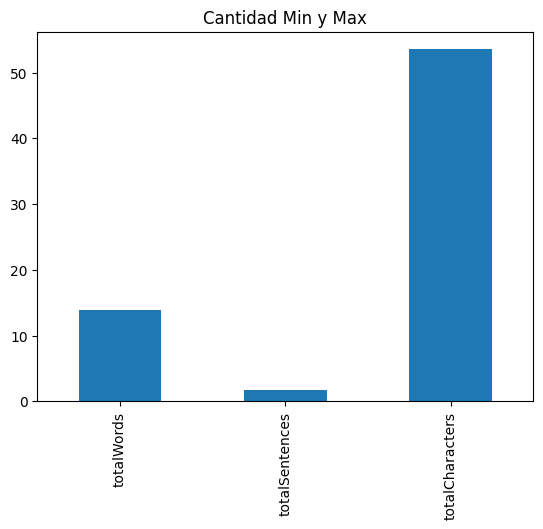

In [555]:
# Estos datos se pueden presentar en un grafico barra para mas apreciacion.
dfPromedio.plot(kind='bar', title = 'Cantidad Min y Max')

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

En esta sección se realizó un análisis exploratorio del texto, enfocándose en la cantidad de oraciones, palabras y caracteres por línea. A partir de estos datos, se calcularon estadísticas descriptivas clave, incluyendo los promedios, los valores mínimos y los máximos observados para cada métrica. Estos resultados permitieron obtener una visión general sobre la estructura del texto y su variabilidad USANDO la libreria Pandas. Asimismo, se generaron visualizaciones que facilitaron la interpretación de estos valores, facilitando aun mas la comprension del texto.


</div>

## 3. Limpieza de datos
### Puntuación máxima de la tarea: 2
#### Investigue y aplique distintas técnicas de limpieza para el conjunto de textos  y explique las razones de la aplicación de cada una de estas

In [556]:
# Tomemos el dataframe con solo la columna lines.
data = df['lines']
cleanDf = pd.DataFrame(data)
# Apliquemos lowercase
cleanDf['lines'] = cleanDf['lines'].str.lower()
cleanDf

,lines
0,scene 1: [wind] [clop clop clop]
1,king arthur: whoa there! [clop clop clop]
2,soldier #1: halt! who goes there?
3,"arthur: it is i, arthur, son of uther pendrago..."
4,soldier #1: pull the other one!
...,...
1187,officer #2: come on. back with 'em. back. r...
1188,inspector: everything? [squeak]
1189,"officer #1: all right, sonny. that's enough. ..."
1190,cameraman: christ!


In [557]:
# Vamos a expandir las abreviaciones
# expand 

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [558]:
# Apliquemos la funcion para expandir abreviaciones
cleanDf['lines'] = cleanDf['lines'].apply(remove_abb)

In [559]:
# Ahora vamos a utilizar la libreria textblob para corregir expresiones en las lineas del texto.
def spelling_correction(text):
    return TextBlob(text).correct().string
    
cleanDf['lines'] = cleanDf['lines'].apply(spelling_correction)
cleanDf

,lines
0,scene 1: [wind] [clot clot clot]
1,king arthur: whoa there! [clot clot clot]
2,soldier #1: halt! who goes there?
3,"arthur: it is i, arthur, son of other pendrago..."
4,soldier #1: pull the other one!
...,...
1187,officer #2: come on. back with 'em. back. r...
1188,inspector: everything? [squeaky]
1189,"officer #1: all right, sunny. that is enough...."
1190,cameraman: christ!


In [560]:
def remove_puctuation(text):
    
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
            
    return text

In [561]:
cleanDf['lines'] = cleanDf['lines'].apply(remove_puctuation)
cleanDf['lines'].head()

0                         scene 1 wind clot clot clot 
1              king arthur whoa there  clot clot clot 
2                       soldier 1 halt  who goes there
3    arthur it is i arthur son of other pendragon f...
4                         soldier 1 pull the other one
Name: lines, dtype: object

In [562]:
# Tokenizamos el texto
cleanDf['tokens'] = cleanDf['lines'].apply(nltk.word_tokenize)
cleanDf

,lines,tokens
0,scene 1 wind clot clot clot,"[scene, 1, wind, clot, clot, clot]"
1,king arthur whoa there clot clot clot,"[king, arthur, whoa, there, clot, clot, clot]"
2,soldier 1 halt who goes there,"[soldier, 1, halt, who, goes, there]"
3,arthur it is i arthur son of other pendragon f...,"[arthur, it, is, i, arthur, son, of, other, pe..."
4,soldier 1 pull the other one,"[soldier, 1, pull, the, other, one]"
...,...,...
1187,officer 2 come on back with em back right ...,"[officer, 2, come, on, back, with, em, back, r..."
1188,inspector everything squeaky,"[inspector, everything, squeaky]"
1189,officer 1 all right sunny that is enough jus...,"[officer, 1, all, right, sunny, that, is, enou..."
1190,cameraman christ,"[cameraman, christ]"


In [563]:
# Usemos stopwords de la libreria nltk para filtrar tokens innecesarios (with, the, a/an, etc)
stop_words = set(stopwords.words('english'))
cleanDf['tokens'] = cleanDf['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print(cleanDf['tokens'])

0                      [scene, 1, wind, clot, clot, clot]
1                  [king, arthur, whoa, clot, clot, clot]
2                                [soldier, 1, halt, goes]
3       [arthur, arthur, son, pendragon, castle, camel...
4                                 [soldier, 1, pull, one]
                              ...                        
1187    [officer, 2, come, back, em, back, right, come...
1188                     [inspector, everything, squeaky]
1189      [officer, 1, right, sunny, enough, pack, crash]
1190                                  [cameraman, christ]
1191                                                   []
Name: tokens, Length: 1192, dtype: object


In [564]:
# Stemming -> Esto nos ayudara a reducir cada palabra a su raiz.
stemmer = PorterStemmer()
cleanDf['stemmed'] = cleanDf['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
cleanDf

,lines,tokens,stemmed
0,scene 1 wind clot clot clot,"[scene, 1, wind, clot, clot, clot]","[scene, 1, wind, clot, clot, clot]"
1,king arthur whoa there clot clot clot,"[king, arthur, whoa, clot, clot, clot]","[king, arthur, whoa, clot, clot, clot]"
2,soldier 1 halt who goes there,"[soldier, 1, halt, goes]","[soldier, 1, halt, goe]"
3,arthur it is i arthur son of other pendragon f...,"[arthur, arthur, son, pendragon, castle, camel...","[arthur, arthur, son, pendragon, castl, cameli..."
4,soldier 1 pull the other one,"[soldier, 1, pull, one]","[soldier, 1, pull, one]"
...,...,...,...
1187,officer 2 come on back with em back right ...,"[officer, 2, come, back, em, back, right, come...","[offic, 2, come, back, em, back, right, come, ..."
1188,inspector everything squeaky,"[inspector, everything, squeaky]","[inspector, everyth, squeaki]"
1189,officer 1 all right sunny that is enough jus...,"[officer, 1, right, sunny, enough, pack, crash]","[offic, 1, right, sunni, enough, pack, crash]"
1190,cameraman christ,"[cameraman, christ]","[cameraman, christ]"


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

La lematización convierte la palabra a su forma base de diccionario. Este proceso tiene en cuenta la gramática y el vocabulario de la lengua durante la conversión. Por lo tanto, se diferencia del Stemming en que no se limita a truncar los sufijos para obtener la palabra raíz.

</div>

In [565]:
# Aplica lematizacion a los tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]


In [566]:
# Hacemos llamado a la funcion de arriba.
cleanDf['dictStemmed'] = cleanDf['stemmed'].apply(lambda x : lemmatize(x))
cleanDf.head()

,lines,tokens,stemmed,dictStemmed
0,scene 1 wind clot clot clot,"[scene, 1, wind, clot, clot, clot]","[scene, 1, wind, clot, clot, clot]","[scene, 1, wind, clot, clot, clot]"
1,king arthur whoa there clot clot clot,"[king, arthur, whoa, clot, clot, clot]","[king, arthur, whoa, clot, clot, clot]","[king, arthur, whoa, clot, clot, clot]"
2,soldier 1 halt who goes there,"[soldier, 1, halt, goes]","[soldier, 1, halt, goe]","[soldier, 1, halt, goe]"
3,arthur it is i arthur son of other pendragon f...,"[arthur, arthur, son, pendragon, castle, camel...","[arthur, arthur, son, pendragon, castl, cameli...","[arthur, arthur, son, pendragon, castl, cameli..."
4,soldier 1 pull the other one,"[soldier, 1, pull, one]","[soldier, 1, pull, one]","[soldier, 1, pull, one]"


In [567]:
cleanDf['totalCharacters'] = cleanDf['lines'].str.len()
cleanDf.head()

,lines,tokens,stemmed,dictStemmed,totalCharacters
0,scene 1 wind clot clot clot,"[scene, 1, wind, clot, clot, clot]","[scene, 1, wind, clot, clot, clot]","[scene, 1, wind, clot, clot, clot]",28
1,king arthur whoa there clot clot clot,"[king, arthur, whoa, clot, clot, clot]","[king, arthur, whoa, clot, clot, clot]","[king, arthur, whoa, clot, clot, clot]",39
2,soldier 1 halt who goes there,"[soldier, 1, halt, goes]","[soldier, 1, halt, goe]","[soldier, 1, halt, goe]",30
3,arthur it is i arthur son of other pendragon f...,"[arthur, arthur, son, pendragon, castle, camel...","[arthur, arthur, son, pendragon, castl, cameli...","[arthur, arthur, son, pendragon, castl, cameli...",137
4,soldier 1 pull the other one,"[soldier, 1, pull, one]","[soldier, 1, pull, one]","[soldier, 1, pull, one]",28


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

Los algoritmos informáticos, incluidos los modelos de IA/ML, no entienden el lenguaje humano, sino los números, por lo que necesitamos convertir nuestros vectores de palabras en representaciones numéricas, comúnmente conocidas como vectores de incrustación, o simplemente incrustación. El siguiente ejemplo convierte texto tokenizado en la columna “dictStemmed” y utiliza un enfoque de vectorización TF-IDF para transformar el texto en representaciones numéricas.

</div>

In [568]:
# crear oraciones para hacer text limpio
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [569]:
cleanDf['cleanText'] = cleanDf['dictStemmed'].apply(lambda x : return_sentences(x))
cleanDf.head()

,lines,tokens,stemmed,dictStemmed,totalCharacters,cleanText
0,scene 1 wind clot clot clot,"[scene, 1, wind, clot, clot, clot]","[scene, 1, wind, clot, clot, clot]","[scene, 1, wind, clot, clot, clot]",28,scene 1 wind clot clot clot
1,king arthur whoa there clot clot clot,"[king, arthur, whoa, clot, clot, clot]","[king, arthur, whoa, clot, clot, clot]","[king, arthur, whoa, clot, clot, clot]",39,king arthur whoa clot clot clot
2,soldier 1 halt who goes there,"[soldier, 1, halt, goes]","[soldier, 1, halt, goe]","[soldier, 1, halt, goe]",30,soldier 1 halt goe
3,arthur it is i arthur son of other pendragon f...,"[arthur, arthur, son, pendragon, castle, camel...","[arthur, arthur, son, pendragon, castl, cameli...","[arthur, arthur, son, pendragon, castl, cameli...",137,arthur arthur son pendragon castl camelia king...
4,soldier 1 pull the other one,"[soldier, 1, pull, one]","[soldier, 1, pull, one]","[soldier, 1, pull, one]",28,soldier 1 pull one


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">

TF-IDF : Frecuencia de términos - Frecuencia inversa de documentos

La frecuencia de términos es el número de veces que un término aparece en un documento. La frecuencia inversa de documentos es una función inversa del número de documentos en los que aparece una palabra determinada.

El producto de estos dos términos da el peso tf-idf de una palabra en el corpus. Cuanto mayor sea la frecuencia de aparición de una palabra, menor será su peso y viceversa. Esto da más peso a los términos poco frecuentes en el corpus y penaliza a los términos más frecuentes.

Otro vectorizador muy utilizado es el Count vectorizer, que sólo tiene en cuenta la frecuencia de aparición de una palabra en el corpus.
</div>

In [570]:
tfidf = TfidfVectorizer()
tfidfVect = tfidf.fit_transform(cleanDf['cleanText'])
tfidfVect.shape

(1192, 1378)

In [571]:
tfidf.get_feature_names_out()

array(['10', '11', '12', ..., 'you', 'young', 'zone'],
      shape=(1378,), dtype=object)

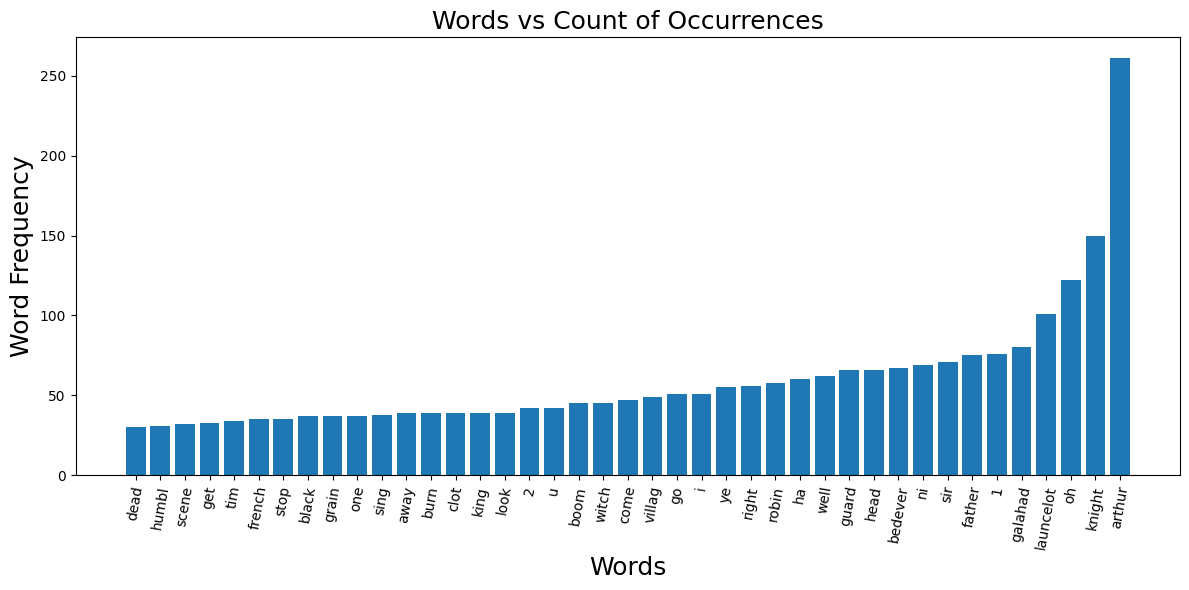

In [572]:
# Aplanar la columna 'dictStemmed'
cleanWords = [word for row in cleanDf['dictStemmed'] for word in row]

# Calcular frecuencias con FreqDist
freqWords = nltk.FreqDist(all_stemmed_words)

# Filtrar las más frecuentes
frequent_words = [[freqWords[word], word] for word in set(cleanWords) if freqWords[word] >= 30]

# Ordenar las palabras por frecuencia
sorted_word_frequencies = {}
for item in sorted(frequent_words):
    sorted_word_frequencies[item[1]] = item[0]

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_word_frequencies)), list(sorted_word_frequencies.values()), align='center')
plt.xticks(range(len(sorted_word_frequencies)), list(sorted_word_frequencies.keys()), rotation=80)
plt.title("Words vs Count of Occurrences", fontsize=18)
plt.xlabel("Words", fontsize=18)
plt.ylabel("Word Frequency", fontsize=18)
plt.tight_layout()
plt.show()


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
En este apartado se trabajó en la limpieza y normalización del texto, lo cual incluyó la tokenización, la eliminación de palabras vacías (stopwords), puntuación y también la lematización,entre otros. Creo que esto es fundamental porque antes de aplicar cualquier tipo de análisis textual, es necesario reducir el ruido del lenguaje natural. Por ejemplo, palabras como “the”, “is” o “and” se repiten muchísimo pero no aportan contenido relevante. Además, al lematizar, se agrupan palabras similares bajo una misma raíz (como “running” y “ran” a “run”), lo que mejora mucho la representación semántica del texto. Esto permite que las estadísticas posteriores y los modelos de análisis funcionen sobre datos más representativos y compactos.





Ademas, se pudo verificar la frecuencia de las palabras gracias a que la data estaba limpia.
</div>

## 4. Contando palabras por su connotación emocional
### Puntuación máxima de la tarea: 2
#### Investigue acerca del corpus opinion_lexicon del NLTK y úselo para identificar las palabras con connotaciones positivas y negativas que aparecen en los textos. Siéntase libre de mostrar estadísticas y gráficos de su elección para ilustrar mejor este aspecto de sus datos (Ej. Totales for tipo, palabra más popular por tipo, entre otros)

In [573]:
# Recoger las palabras en sets 
positives = set(opinion_lexicon.positive())
negatives = set(opinion_lexicon.negative())


In [574]:
# verificamos los tokens que tenemos
cleanWords[0:20]

['scene',
 '1',
 'wind',
 'clot',
 'clot',
 'clot',
 'king',
 'arthur',
 'whoa',
 'clot',
 'clot',
 'clot',
 'soldier',
 '1',
 'halt',
 'goe',
 'arthur',
 'arthur',
 'son',
 'pendragon']

In [575]:
# Ahora lo que hacemos es una lista de tokens positivos y otra lista de tokens negativos.
positivesTokens = [word for word in cleanWords if word in positives]
negativeTokens = [word for word in cleanWords if word in negatives]

In [576]:
# Veamos datos interesantes como totales por tipo
dfFrequency = pd.DataFrame({'Tipo': ['Positivas', 'Negativas'], 'Total por Tipo': [sum(1 for word in cleanWords if word in positives), sum(1 for word in cleanWords if word in negatives)]})
dfFrequency

,Tipo,Total por Tipo
0,Positivas,375
1,Negativas,305


In [577]:
# Continuacion de datos importantes
positiveData = nltk.FreqDist(positivesTokens)
negativeData = nltk.FreqDist(negativeTokens)

# Mas popular entre tipo
print(f'La palabra mas popular de las positivas es: {positiveData.max()}')
print(f'La palabra mas popular de las negativas es: {negativeData.max()}')

La palabra mas popular de las positivas es: well
La palabra mas popular de las negativas es: burn


<Axes: ylabel='Total por Tipo'>

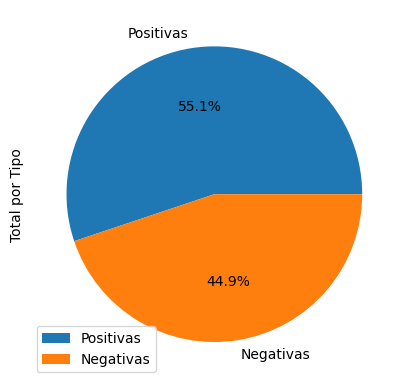

In [578]:
dfFrequency.plot.pie(y='Total por Tipo', labels=dfFrequency['Tipo'], autopct='%1.1f%%')

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
En este apartado se midió si lo que se dice en el texto es positivo o negativo, y qué tan personal u objetivo parece. Creo que esto es útil porque no solo importa qué palabras se usan, sino el tono con el que se dicen. Por ejemplo, no es lo mismo decir “qué bien” que “qué mal”. Me pareció interesante ver cómo se puede detectar ese tipo de emociones desde el texto, y es algo que se puede aplicar en muchas situaciones.

</div>

## 5. Wordnet
### Puntuación máxima de la tarea: 4
#### Investigue sobre el corpus Wordnet, disponible en NLTK. Desarrolle una función en Python que reciba  un conjunto de textos y, usando  Wordnet, devuelva en una única estructura de su elección, los diferentes synsets de cada palabra de acuerdo a la función que ejerce en el texto (sea sustantivo, verbo, adjetivo o adverbio). Pruebe dicha función sobre el conjunto de datos. 

In [579]:
# Mapeamos etiquetas de pos_tag a WordNet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Función para obtener synsets de cada palabra en cada línea
def get_synsets_from_texts(texts):
    result = []
    for line in texts:
        line_data = {}
        tokens = nltk.word_tokenize(line)
        tagged = nltk.pos_tag(tokens)
        for word, tag in tagged:
            wn_tag = get_wordnet_pos(tag)
            # print(wn_tag)
            if wn_tag:
                synsets = wordnet.synsets(word, pos=wn_tag)
                line_data[word] = synsets
        result.append(line_data)
    return result


In [580]:
# Aplicamos sobre el dataset
synsets_per_line = get_synsets_from_texts(cleanDf['lines'])

In [581]:
# Ejemplo: ver synsets de la primera línea
synsets_per_line[2]

{'soldier': [],
 'halt': [Synset('arrest.n.02'), Synset('stop.n.01'), Synset('freeze.n.03')],
 'goes': [Synset('travel.v.01'),
  Synset('go.v.02'),
  Synset('go.v.03'),
  Synset('become.v.01'),
  Synset('go.v.05'),
  Synset('run.v.05'),
  Synset('run.v.03'),
  Synset('proceed.v.04'),
  Synset('go.v.09'),
  Synset('go.v.10'),
  Synset('sound.v.02'),
  Synset('function.v.01'),
  Synset('run_low.v.01'),
  Synset('move.v.13'),
  Synset('survive.v.01'),
  Synset('go.v.16'),
  Synset('die.v.01'),
  Synset('belong.v.03'),
  Synset('go.v.19'),
  Synset('start.v.09'),
  Synset('move.v.15'),
  Synset('go.v.22'),
  Synset('go.v.23'),
  Synset('blend.v.02'),
  Synset('go.v.25'),
  Synset('fit.v.02'),
  Synset('rifle.v.02'),
  Synset('go.v.28'),
  Synset('plump.v.04'),
  Synset('fail.v.04')],
 'there': [Synset('there.r.01'), Synset('there.r.02'), Synset('there.r.03')]}

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Aquí se utilizó una herramienta llamada WordNet para buscar los posibles significados de cada palabra según el tipo que sea (como sustantivo, verbo, adjetivo o adverbio). Se hizo una función que analiza cada línea de texto y guarda los significados más relacionados con la función que tiene la palabra. Creo que esto es fundamental porque a veces una misma palabra puede tener varios sentidos, y poder ver esos sentidos ayuda a entender mejor lo que se está leyendo. Aunque es un tema nuevo, me pareció interesante porque acerca el análisis de texto a algo más parecido a cómo entendemos el lenguaje las personas.


</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
<strong>Referencias Bibliográficas</strong>
<br><br>
Para esta referencia bibliográfica adjunto unos recursos que fueron de grata ayuda.

- [Text Processing NLP Pipeline - GitHub](https://github.com/Shubha23/Text-processing-NLP/blob/master/NLP%20-%20Text%20processing%20pipeline.ipynb)
- [How to Clean & Preprocess Text Data Using Pandas for NLP Tasks - LinkedIn](https://www.linkedin.com/pulse/how-clean-preprocess-text-data-using-pandas-nlp-tasks-yamil-garcia-gk7re/)
- [Cleaning and Preprocessing Text Data in Pandas for NLP Tasks - KDnuggets](https://www.kdnuggets.com/cleaning-and-preprocessing-text-data-in-pandas-for-nlp-tasks)
- [Pandas on NLP Data - Kaggle](https://www.kaggle.com/code/campusx/pandas-on-nlp-data)
- [Pandas DataFrame Pie Plot - Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)
- [Pandas Plotting - W3Schools](https://www.w3schools.com/python/pandas/pandas_plotting.asp)
- [TextBlob Spelling Correction - Documentation](https://textblob.readthedocs.io/en/dev/quickstart.html#spelling-correction)
- [TfidfVectorizer - scikit-learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- [FreqDist - NLTK Documentation](https://www.nltk.org/api/nltk.probability.FreqDist.html)



</div>